# Methoden en Technieken -- Blok 2

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- B2: Je stelt op basis van requirements een **geschikte architectuur** voor een AI-oplossing op en selecteert daarvoor passende AI-technieken, gebruik makend van **machine learning**, **deep learning**, **kennisrepresentatie**, **computer vision** en natural language processing.
- B3: Je prepareert een dataset voor het **trainen en testen** van een AI-model rekening houdend met technische en ethische randvoorwaarden.
- B4: **Je ontwikkelt, traint en evalueert een AI-model** volgens een **iteratief proces**.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria** die in het vakgebied erkend worden waaronder robustness, **performance**, scalability, explainability, model complexity en resource demand.

## De opdracht

In de slides van les 12 word beschreven hoe we een Deep Belief Netwerk unsupervised trainen op de MNIST data. 

In deze opdracht gaan we dit gebruiken om een MNIST classifier semi-supervised te trainen. We doen hier alsof slechts 500 van de 70000 MNIST afbeeldingen gelabeld zijn (zie code hieronder, deze maakt de data aan die je mag gebruiken). Je zult dus:
- Een DBN unsupervised trainen op de data
- Een classifier trainen op de latent space van de DBN en de gelabelde data

Je mag zelf kiezen:
- De architectuur van de DBN (let op, deze zal wat tijd kosten om te trainen)
- De classifier op de latent space (alles is toegestaan)
- Hoe je de modellen beoordeelt

Probeer een zo'n goed mogelijk model te krijgen (in een redelijke tijd), verantwoord je keuzes. Bespreek je uiteindelijke model in detail, eerdere pogingen/modellen mogen korter besproken worden.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow import keras
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import BernoulliRBM
from ipywidgets import interactive
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import torch.nn.functional as F


In [30]:
(x1, y), (x2, _) = keras.datasets.mnist.load_data()
x = np.concatenate((x1, x2))

x = np.expand_dims(x, -1).astype("float32") / 255

y = y[:500]

del x1, x2

In [31]:
# Select the first 500 labels as labeled data
labeled_x = x[:500]
labeled_y = y[:500]

# The rest are unlabeled data
unlabeled_x = x[500:]

# Warning:

If one classification report or confusion matrix gets updated, all of them change.

This means that all the confusion matrices you see are the same as the one in the conclusion and do not contain information specific to the code they are associated with.

In [194]:
X_labeled_train, x_labeled_remaining, y_labeled_train,  y_labeled_remaining = train_test_split(labeled_x, labeled_y, test_size=0.2, random_state = 42)
X_labeled_validation, X_labeled_test,y_labeled_validation,  y_test = train_test_split(x_labeled_remaining, y_labeled_remaining, test_size=0.5, random_state = 42)
y_labeled_train = keras.utils.to_categorical(y_labeled_train, 10)
y_labeled_validation = keras.utils.to_categorical(y_labeled_validation, 10)
y_labeled_test = keras.utils.to_categorical(y_test, 10)

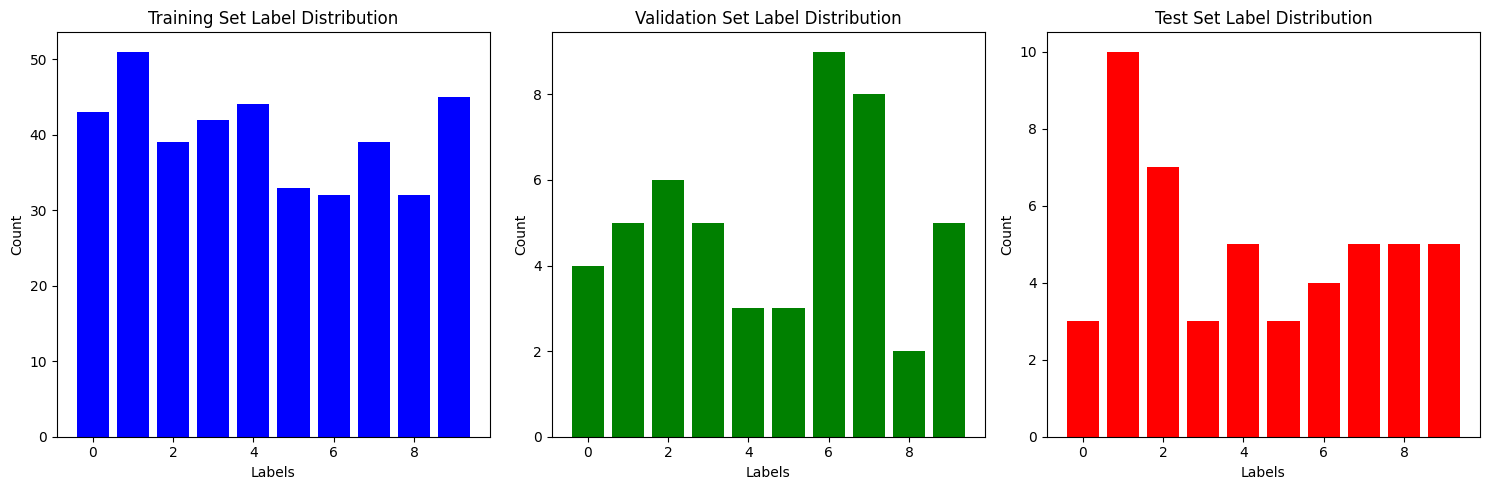

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_labeled_train, y_labeled_validation, and y_labeled_test are already defined and one-hot encoded

# Convert one-hot encoded labels back to single integer labels
y_train_labels = np.argmax(y_labeled_train, axis=1)
y_val_labels = np.argmax(y_labeled_validation, axis=1)
y_test_labels = np.argmax(y_labeled_test, axis=1)

# Count the number of occurrences of each label
train_label_counts = np.bincount(y_train_labels)
val_label_counts = np.bincount(y_val_labels)
test_label_counts = np.bincount(y_test_labels)

# Define the labels
labels = range(10)

# Plot the label counts for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, train_label_counts, color='blue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Training Set Label Distribution')

plt.subplot(1, 3, 2)
plt.bar(labels, val_label_counts, color='green')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Validation Set Label Distribution')

plt.subplot(1, 3, 3)
plt.bar(labels, test_label_counts, color='red')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Test Set Label Distribution')

plt.tight_layout()
plt.show()

The data is niceley split, but some labels are a bit sparce so it a new and stratisfied split would be a good idea.

In [196]:
X_labeled_train, x_labeled_remaining, y_labeled_train,  y_labeled_remaining = train_test_split(labeled_x, labeled_y, test_size=0.2, random_state = 42, stratify=labeled_y)
X_labeled_validation, X_labeled_test,y_labeled_validation,  y_test = train_test_split(x_labeled_remaining, y_labeled_remaining, test_size=0.5, random_state = 42, stratify=y_labeled_remaining)
y_labeled_train = keras.utils.to_categorical(y_labeled_train, 10)
y_labeled_validation = keras.utils.to_categorical(y_labeled_validation, 10)
y_labeled_test = keras.utils.to_categorical(y_test, 10)

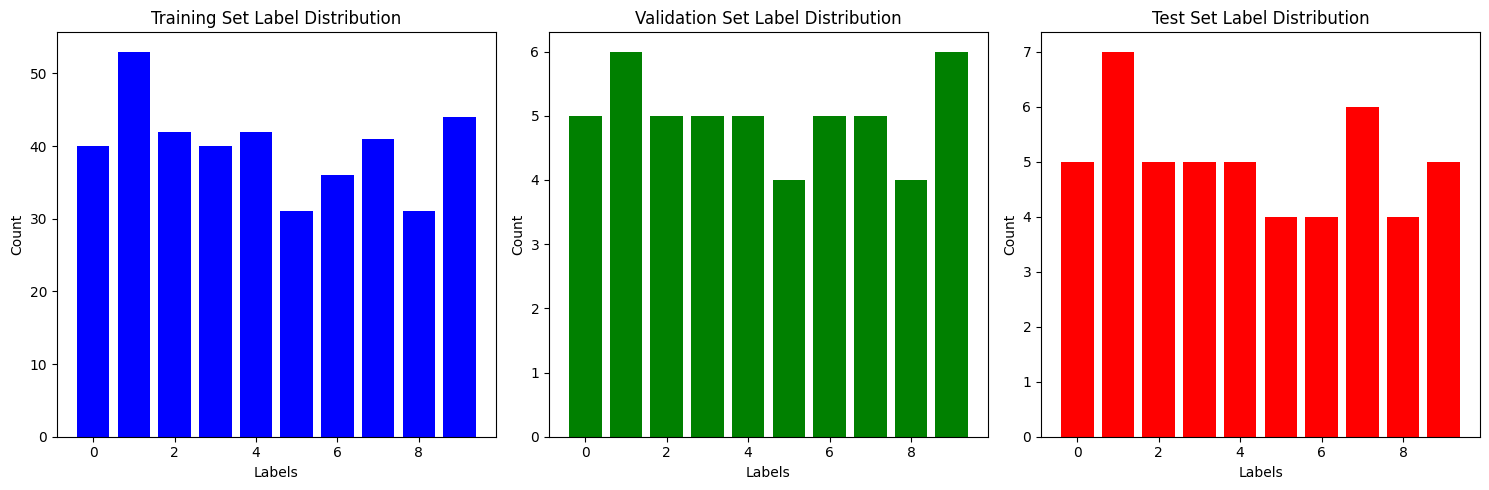

In [197]:
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot encoded labels back to single integer labels
y_train_labels = np.argmax(y_labeled_train, axis=1)
y_val_labels = np.argmax(y_labeled_validation, axis=1)
y_test_labels = np.argmax(y_labeled_test, axis=1)

# Count the number of occurrences of each label
train_label_counts = np.bincount(y_train_labels)
val_label_counts = np.bincount(y_val_labels)
test_label_counts = np.bincount(y_test_labels)

# Define the labels
labels = range(10)

# Plot the label counts for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, train_label_counts, color='blue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Training Set Label Distribution')

plt.subplot(1, 3, 2)
plt.bar(labels, val_label_counts, color='green')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Validation Set Label Distribution')

plt.subplot(1, 3, 3)
plt.bar(labels, test_label_counts, color='red')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Test Set Label Distribution')

plt.tight_layout()
plt.show()

Not only is there plenty of data for each label now, the proportions of the labels is also the same in each dataset.

Reshape the data.

In [169]:
print(X_labeled_train.shape)

(350, 28, 28, 1)


In [187]:
unlabeled_x = unlabeled_x.reshape(len(unlabeled_x), -1)
X_labeled_train = X_labeled_train.reshape(len(X_labeled_train), -1)
X_labeled_validation = X_labeled_validation.reshape(len(X_labeled_validation), -1)
X_labeled_test = X_labeled_test.reshape(len(X_labeled_test), -1)

In [171]:
print(X_labeled_train.shape)

(350, 784)


Add null model

# Itteratie 0

In [104]:
hidden_sizes = [364, 91, 45]

In [ ]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 100, random_state = 42, verbose=1)    
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -159.31, time = 4.56s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -124.88, time = 5.36s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.38, time = 5.38s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -107.03, time = 5.39s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -101.59, time = 5.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -97.75, time = 5.35s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -94.37, time = 5.43s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -91.28, time = 5.48s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -89.30, time = 5.47s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -88.11, time = 5.46s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -86.23, time = 5.50s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -84.56, time = 5.49s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -83.44, time = 5.53s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -82.11, time = 5.53s
[BernoulliRBM] Iteration

In [114]:
with open('DBN_2B_0.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [115]:
with open('DBN_2B_0.pickle', 'rb') as file:
    RBMs = pickle.load(file)

In [106]:
def sample(rbms, rng, ngibbs=20):

    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2, -1, -1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

RBM inner representatation of the number.

In [107]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))
        

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…

How good the model is at recognising the numbers.

In [108]:
def makeplot2(n, seed):
    rng = np.random.RandomState(seed)
    img = X_labeled_train[n]
    plt.figure(figsize = (50,20))
    plt.subplot(2,5,1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    for i in range(9):
        x = img.reshape(1,-1)
        for rbm in RBMs:
            x = rbm._sample_hiddens(x,rng)
        for rbm in reversed(RBMs):
            x = rbm._sample_visibles(x,rng)
        plt.subplot(2,5,i+2)
        plt.imshow(x.reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    
interactive(makeplot2, n=(0,20), seed = (0,20))

interactive(children=(IntSlider(value=10, description='n', max=20), IntSlider(value=10, description='seed', ma…

In [122]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        
        self.fc1 = nn.Linear(45, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.relu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))

# Freeze the first 3 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
    
print(model)

RBMPyTorchModel(
  (rbm1): Linear(in_features=784, out_features=364, bias=True)
  (rbm2): Linear(in_features=364, out_features=91, bias=True)
  (rbm3): Linear(in_features=91, out_features=45, bias=True)
  (fc1): Linear(in_features=45, out_features=10, bias=True)
)


In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Initialize lists to store loss and validation loss
train_losses1 = []
val_losses1 = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_losses1.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses1.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

Epoch [1/100], Loss: 2.0992, Val Loss: 1.9760
Epoch [2/100], Loss: 2.0836, Val Loss: 1.6083
Epoch [3/100], Loss: 1.9121, Val Loss: 1.2281
Epoch [4/100], Loss: 1.7288, Val Loss: 0.9756
Epoch [5/100], Loss: 1.6031, Val Loss: 0.8161
Epoch [6/100], Loss: 1.6099, Val Loss: 0.7196
Epoch [7/100], Loss: 1.6467, Val Loss: 0.6469
Epoch [8/100], Loss: 1.5447, Val Loss: 0.5927
Epoch [9/100], Loss: 1.5097, Val Loss: 0.5485
Epoch [10/100], Loss: 1.5038, Val Loss: 0.5123
Epoch [11/100], Loss: 1.5008, Val Loss: 0.4863
Epoch [12/100], Loss: 1.4733, Val Loss: 0.4581
Epoch [13/100], Loss: 1.3963, Val Loss: 0.4372
Epoch [14/100], Loss: 1.3697, Val Loss: 0.4173
Epoch [15/100], Loss: 1.3124, Val Loss: 0.4060
Epoch [16/100], Loss: 1.3403, Val Loss: 0.3924
Epoch [17/100], Loss: 1.3195, Val Loss: 0.3782
Epoch [18/100], Loss: 1.3588, Val Loss: 0.3708
Epoch [19/100], Loss: 1.3310, Val Loss: 0.3627
Epoch [20/100], Loss: 1.3704, Val Loss: 0.3532
Epoch [21/100], Loss: 1.4099, Val Loss: 0.3495
Epoch [22/100], Loss: 

In [117]:
# Save the model
torch.save(model.state_dict(), 'model_0.pth')
print("Model saved!")

Model saved!


In [118]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model_0.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

Model loaded!


C:\Users\jelma\AppData\Local\Temp\ipykernel_9132\3365279233.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_1.pth'))


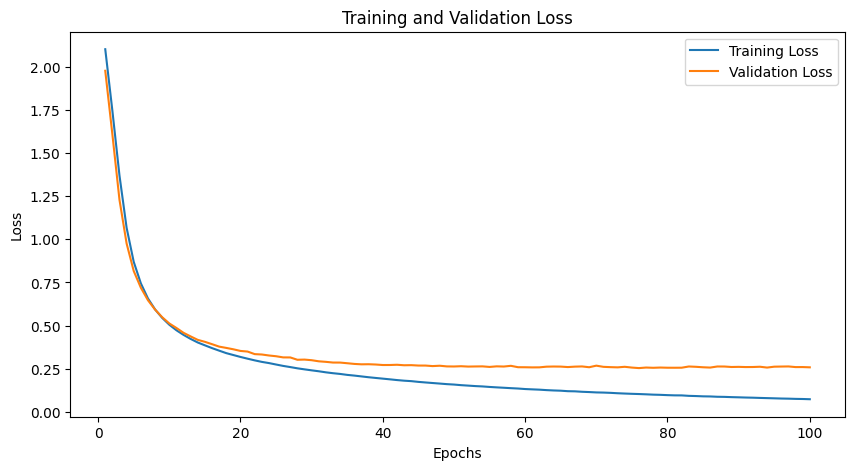

In [124]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

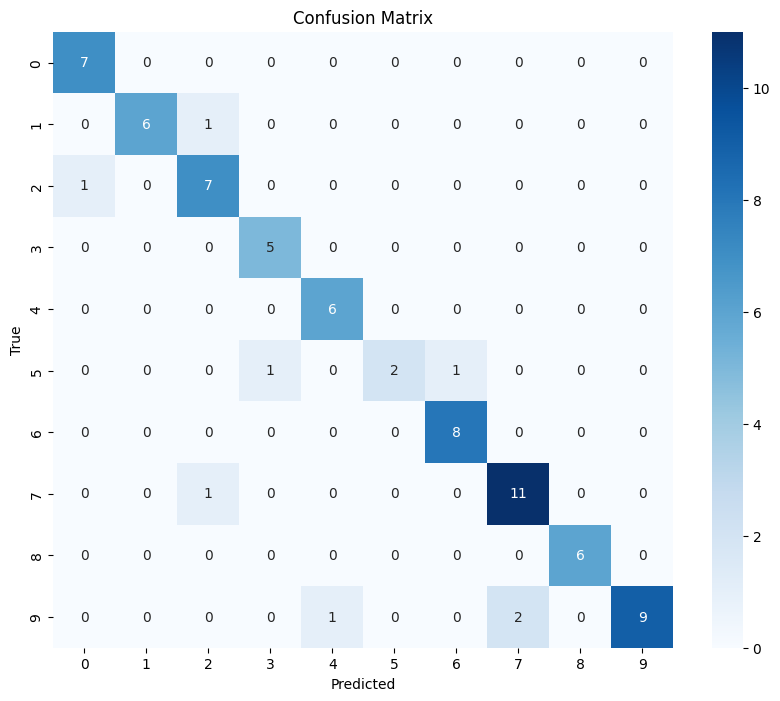

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7
           2       0.78      0.88      0.82         8
           3       0.83      1.00      0.91         5
           4       0.86      1.00      0.92         6
           5       1.00      0.50      0.67         4
           6       0.89      1.00      0.94         8
           7       0.85      0.92      0.88        12
           8       1.00      1.00      1.00         6
           9       1.00      0.75      0.86        12

    accuracy                           0.89        75
   macro avg       0.91      0.89      0.89        75
weighted avg       0.91      0.89      0.89        75



In [125]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))


# Itteratie 1

In [ ]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        
        self.fc1 = nn.Linear(45, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))

# Freeze the first 3 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
    
print(model)

In [ ]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model_0.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

In [ ]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        
        self.fc1 = nn.Linear(45, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))

# Freeze the first 3 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
    
print(model)

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model_1.pth')
print("Model saved!")

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Itteratie dead end 1

In [ ]:
hidden_sizes = [364, 91, 45, 10]

In [ ]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 100, random_state = 42, verbose=1)    
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

In [ ]:
with open('DBN_2B_D1.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [ ]:
with open('DBN_2B_D1.pickle', 'rb') as file:
    RBMs = pickle.load(file)

In [ ]:
def sample(rbms, rng, ngibbs=20):

    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2, -1, -1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

In [ ]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))

In [ ]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        self.rbm3 = nn.Linear(10, 10, bias=True)
        
        self.fc1 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.sigmoid(self.rbm4(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))

    model.rbm3.weight.copy_(torch.tensor(RBMs[3].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[3].intercept_hidden_))

# Freeze the first layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
for param in model.rbm4.parameters():
    param.requires_grad = False
    
print(model)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Initialize lists to store loss and validation loss
train_losses1 = []
val_losses1 = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_losses1.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses1.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model_1.pth')
print("Model saved!")

In [ ]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model_1.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses1, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Itteratie 2

In [151]:
hidden_sizes = [364, 91, 45]

In [152]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 50, random_state = 42, verbose=1)    
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -159.31, time = 4.56s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -124.88, time = 5.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.38, time = 5.36s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -107.03, time = 5.35s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -101.59, time = 5.38s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -97.75, time = 5.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -94.37, time = 5.47s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -91.28, time = 5.45s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -89.30, time = 5.49s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -88.11, time = 5.47s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -86.23, time = 5.45s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -84.56, time = 5.52s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -83.44, time = 5.53s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -82.11, time = 5.55s
[BernoulliRBM] Iteration

In [ ]:
with open('DBN_2B_2.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [ ]:
with open('DBN_2B_2.pickle', 'rb') as file:
    RBMs = pickle.load(file)

In [153]:
def sample(rbms, rng, ngibbs=20):

    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2, -1, -1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

In [154]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…

In [155]:
def makeplot2(n, seed):
    rng = np.random.RandomState(seed)
    img = X_labeled_train[n]
    plt.figure(figsize = (50,20))
    plt.subplot(2,5,1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    for i in range(9):
        x = img.reshape(1,-1)
        for rbm in RBMs:
            x = rbm._sample_hiddens(x,rng)
        for rbm in reversed(RBMs):
            x = rbm._sample_visibles(x,rng)
        plt.subplot(2,5,i+2)
        plt.imshow(x.reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    
interactive(makeplot2, n=(0,20), seed = (0,20))

interactive(children=(IntSlider(value=10, description='n', max=20), IntSlider(value=10, description='seed', ma…

In [156]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        
        self.fc1 = nn.Linear(45, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))

# Freeze the first layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
    
print(model)

RBMPyTorchModel(
  (rbm1): Linear(in_features=784, out_features=364, bias=True)
  (rbm2): Linear(in_features=364, out_features=91, bias=True)
  (fc1): Linear(in_features=91, out_features=10, bias=True)
)


In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store loss and validation loss
train_losses2 = []
val_losses2 = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_losses2.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses2.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

Epoch [1/100], Loss: 1.6755, Val Loss: 1.7037
Epoch [2/100], Loss: 1.2917, Val Loss: 1.0777
Epoch [3/100], Loss: 1.0637, Val Loss: 0.7677
Epoch [4/100], Loss: 0.9332, Val Loss: 0.6151
Epoch [5/100], Loss: 0.8938, Val Loss: 0.5270
Epoch [6/100], Loss: 0.8259, Val Loss: 0.4676
Epoch [7/100], Loss: 0.8235, Val Loss: 0.4229
Epoch [8/100], Loss: 0.7634, Val Loss: 0.3950
Epoch [9/100], Loss: 0.6512, Val Loss: 0.3643
Epoch [10/100], Loss: 0.6442, Val Loss: 0.3473
Epoch [11/100], Loss: 0.6594, Val Loss: 0.3350
Epoch [12/100], Loss: 0.6352, Val Loss: 0.3199
Epoch [13/100], Loss: 0.5933, Val Loss: 0.3064
Epoch [14/100], Loss: 0.5339, Val Loss: 0.2962
Epoch [15/100], Loss: 0.5646, Val Loss: 0.2913
Epoch [16/100], Loss: 0.4852, Val Loss: 0.2823
Epoch [17/100], Loss: 0.5093, Val Loss: 0.2744
Epoch [18/100], Loss: 0.4798, Val Loss: 0.2689
Epoch [19/100], Loss: 0.4774, Val Loss: 0.2684
Epoch [20/100], Loss: 0.5257, Val Loss: 0.2607
Epoch [21/100], Loss: 0.4714, Val Loss: 0.2612
Epoch [22/100], Loss: 

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model_2.pth')
print("Model saved!")

In [ ]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model_2.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

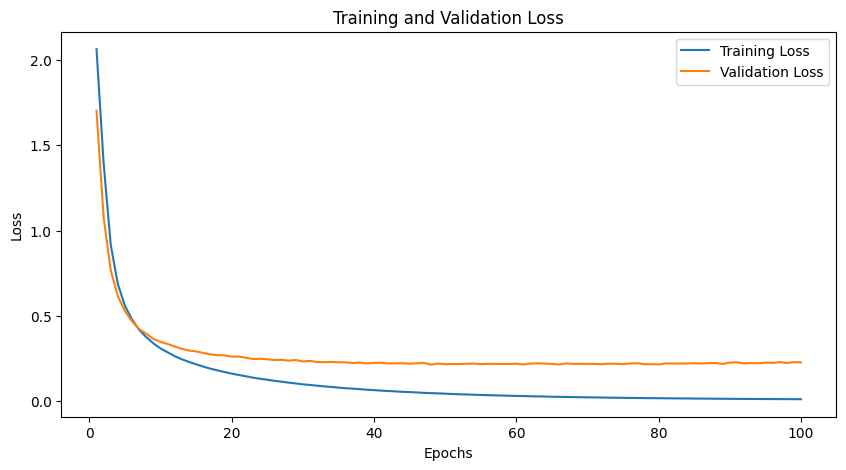

In [158]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses2, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

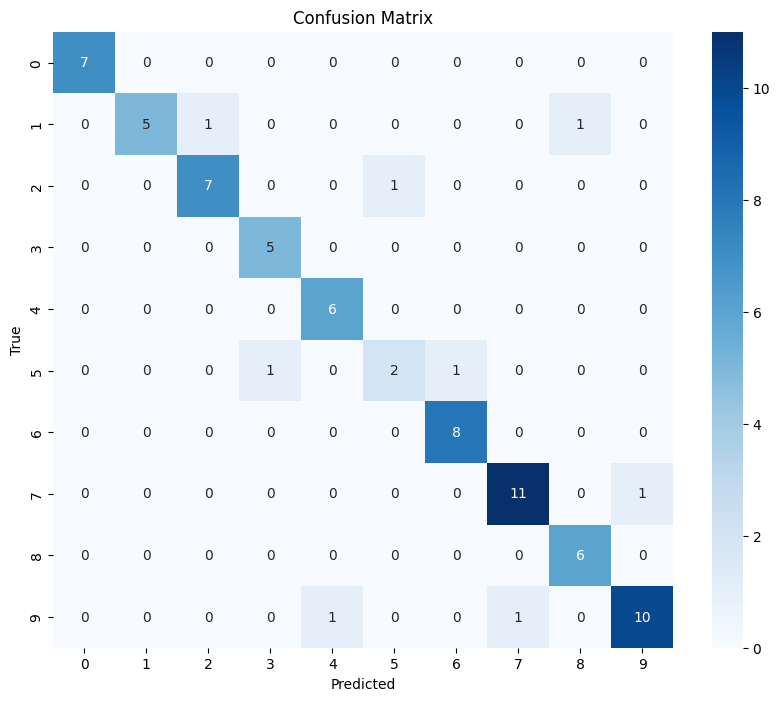

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.71      0.83         7
           2       0.88      0.88      0.88         8
           3       0.83      1.00      0.91         5
           4       0.86      1.00      0.92         6
           5       0.67      0.50      0.57         4
           6       0.89      1.00      0.94         8
           7       0.92      0.92      0.92        12
           8       0.86      1.00      0.92         6
           9       0.91      0.83      0.87        12

    accuracy                           0.89        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.90      0.89      0.89        75



In [159]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Itteratie 3

Do minimum size model: something like: random, 10

In [163]:
hidden_sizes = [364, 91]

In [ ]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 50, random_state = 42, verbose=1)    
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -159.31, time = 4.62s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -124.88, time = 5.42s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.38, time = 5.38s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -107.03, time = 5.38s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -101.59, time = 5.46s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -97.75, time = 5.49s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -94.37, time = 5.48s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -91.28, time = 5.42s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -89.30, time = 5.51s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -88.11, time = 5.50s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -86.23, time = 5.52s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -84.56, time = 5.51s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -83.44, time = 5.54s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -82.11, time = 5.53s
[BernoulliRBM] Iteration

In [92]:
with open('DBN_2B_3.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [93]:
with open('DBN_2B_3.pickle', 'rb') as file:
    RBMs = pickle.load(file)

In [165]:
def sample(rbms, rng, ngibbs=20):

    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2, -1, -1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

In [166]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))
        

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…

In [130]:
def makeplot2(n, seed):
    rng = np.random.RandomState(seed)
    img = X_labeled_train[n]
    plt.figure(figsize = (50,20))
    plt.subplot(2,5,1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    for i in range(9):
        x = img.reshape(1,-1)
        for rbm in RBMs:
            x = rbm._sample_hiddens(x,rng)
        for rbm in reversed(RBMs):
            x = rbm._sample_visibles(x,rng)
        plt.subplot(2,5,i+2)
        plt.imshow(x.reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    
interactive(makeplot2, n=(0,20), seed = (0,20))

interactive(children=(IntSlider(value=10, description='n', max=20), IntSlider(value=10, description='seed', ma…

Evaluate on the epochs.

Evaluate on the evaluation metrics (probably just lookit at the images ;).

Add minimum size layers: 1, 10

Uitleggen waarom welke activatie functie gebruikt bij elke layer.

In [135]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        
        self.fc1 = nn.Linear(91, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))

# Freeze the first 4 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
    
print(model)

RBMPyTorchModel(
  (rbm1): Linear(in_features=784, out_features=364, bias=True)
  (rbm2): Linear(in_features=364, out_features=91, bias=True)
  (fc1): Linear(in_features=91, out_features=10, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store loss and validation loss
train_losses2 = []
val_losses2 = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_losses2.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses2.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

Epoch [1/100], Loss: 2.3060, Val Loss: 1.7989
Epoch [2/100], Loss: 1.6989, Val Loss: 1.1288
Epoch [3/100], Loss: 1.3971, Val Loss: 0.7984
Epoch [4/100], Loss: 1.3062, Val Loss: 0.6419
Epoch [5/100], Loss: 1.0393, Val Loss: 0.5337
Epoch [6/100], Loss: 0.9506, Val Loss: 0.4756
Epoch [7/100], Loss: 0.8632, Val Loss: 0.4288
Epoch [8/100], Loss: 0.8472, Val Loss: 0.3993
Epoch [9/100], Loss: 0.8069, Val Loss: 0.3754
Epoch [10/100], Loss: 0.7106, Val Loss: 0.3525
Epoch [11/100], Loss: 0.6399, Val Loss: 0.3302
Epoch [12/100], Loss: 0.5475, Val Loss: 0.3153
Epoch [13/100], Loss: 0.6059, Val Loss: 0.3085
Epoch [14/100], Loss: 0.5420, Val Loss: 0.2957
Epoch [15/100], Loss: 0.5472, Val Loss: 0.2864
Epoch [16/100], Loss: 0.5323, Val Loss: 0.2784
Epoch [17/100], Loss: 0.5181, Val Loss: 0.2752
Epoch [18/100], Loss: 0.5261, Val Loss: 0.2707
Epoch [19/100], Loss: 0.4960, Val Loss: 0.2640
Epoch [20/100], Loss: 0.4998, Val Loss: 0.2607
Epoch [21/100], Loss: 0.4780, Val Loss: 0.2565
Epoch [22/100], Loss: 

In [99]:
# Save the model
torch.save(model.state_dict(), 'model_3.pth')
print("Model saved!")

Model saved!


In [100]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model_3.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

Model loaded!


C:\Users\jelma\AppData\Local\Temp\ipykernel_9132\1777792011.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_2.pth'))


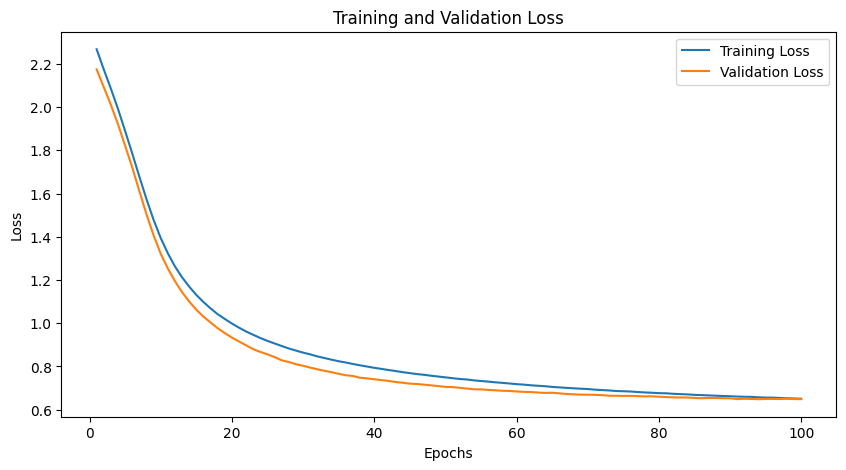

In [101]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses2, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Evaluate on the epochs.

Explain why the optimizer.

Evaluate on learning rate.

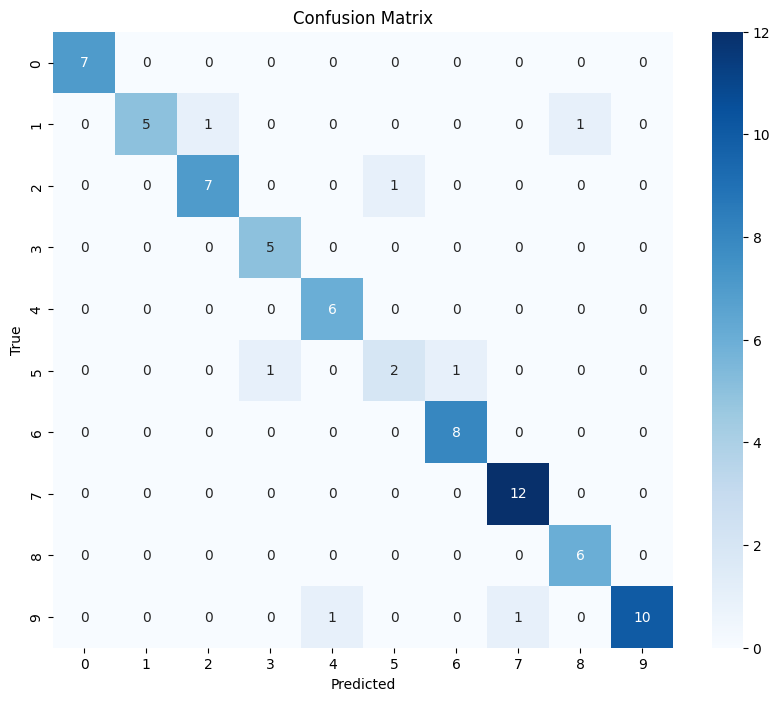

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.71      0.83         7
           2       0.88      0.88      0.88         8
           3       0.83      1.00      0.91         5
           4       0.86      1.00      0.92         6
           5       0.67      0.50      0.57         4
           6       0.89      1.00      0.94         8
           7       0.92      1.00      0.96        12
           8       0.86      1.00      0.92         6
           9       1.00      0.83      0.91        12

    accuracy                           0.91        75
   macro avg       0.89      0.89      0.88        75
weighted avg       0.91      0.91      0.90        75



In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))


# Itteratie 4

In [ ]:
hidden_sizes = [364, 91]

In [ ]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 25, random_state = 42, verbose=1)    
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

In [ ]:
with open('DBN_2B_4.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [ ]:
with open('DBN_2B_4.pickle', 'rb') as file:
    RBMs = pickle.load(file)

In [ ]:
def sample(rbms, rng, ngibbs=20):

    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2, -1, -1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

In [ ]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))

In [ ]:
def makeplot2(n, seed):
    rng = np.random.RandomState(seed)
    img = X_labeled_train[n]
    plt.figure(figsize = (50,20))
    plt.subplot(2,5,1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    for i in range(9):
        x = img.reshape(1,-1)
        for rbm in RBMs:
            x = rbm._sample_hiddens(x,rng)
        for rbm in reversed(RBMs):
            x = rbm._sample_visibles(x,rng)
        plt.subplot(2,5,i+2)
        plt.imshow(x.reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    
interactive(makeplot2, n=(0,20), seed = (0,20))

In [ ]:
# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        
        # self.fc1 = nn.Linear(10, 10)
        self.fc1 = nn.Linear(91, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.nn.functional.silu(self.fc1(x))
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))

# Freeze the first 4 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
    
print(model)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store loss and validation loss
train_losses2 = []
val_losses2 = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_losses2.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses2.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses2, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Convert validation data to PyTorch tensor
X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get raw logits from the model
y_pred_logits = model(X_val)

# Apply softmax to convert logits to probabilities
y_pred_probs = F.softmax(y_pred_logits, dim=1)

# Get the predicted classes (index of the max probability)
y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Get ground truth labels (convert to class indices if needed)
y_true = y_labeled_validation
if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), 
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes))


# Itteratie 5

Evalueer het aantal epochs op het pytorch model.

# Conclusie

Evaluate on the metrics.

Compare final result to the null model.

Evaluate final model on the metrics (cross entropy or something).

Manualy grade the results of the image classification.